In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np

In [34]:
FILE_NAME = 'oil_price.txt'

In [35]:
feature_list = []
target_list = []
with open(FILE_NAME, 'r') as f:
    for line in f.readlines():
        day, price = line.strip().split(' ')
        feature_list.append([int(day)])
        # Support only integer, so, multiply by 100
        target_list.append(int(float(price) * 100))

In [36]:
linear = LinearRegression().fit(feature_list, target_list)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.0001).fit(feature_list, target_list)

In [37]:
# Extend a number of days for forecasting the future 
last_day = len(feature_list)
for i in range(1, 366):
    feature_list.append([last_day + i])
    target_list.append(np.nan)

In [38]:
# Convert back to float, so, divide every element by 100
linear_pred = list(map(lambda x: float(x) / 100, linear.predict(feature_list)))
svr_rbf_pred = list(map(lambda x: float(x) / 100, svr_rbf.predict(feature_list)))
target = list(map(lambda x: float(x) / 100, target_list))

In [39]:
# Display the prediction at 1 day, 30 days, and 365 days after the last available data
print('==== Linear regression prediction ====')
print(' - 1 day : ', linear_pred[last_day])
print(' - 30 days : ', linear_pred[last_day + 29])
print(' - 365 days : ', linear_pred[last_day + 364])

print('==== Support vector regression  prediction ====')
print(' - 1 day : ', svr_rbf_pred[last_day])
print(' - 30 days : ', svr_rbf_pred[last_day + 29])
print(' - 365 days : ', svr_rbf_pred[last_day + 364])

==== Linear regression prediction ====
 - 1 day :  25.02571126760563
 - 30 days :  21.466441284799274
 - 365 days :  -19.64926368899827
==== Support vector regression  prediction ====
 - 1 day :  47.491481288568885
 - 30 days :  43.33333818279487
 - 365 days :  62.989585214346626


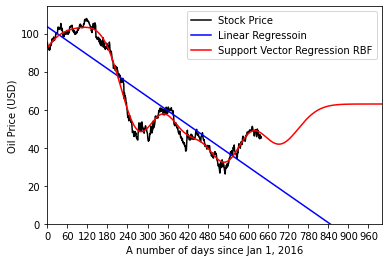

In [40]:
# Plot data out

plt.plot(feature_list, target, color='black', label='Stock Price')
plt.plot(feature_list, linear_pred, color='blue', label='Linear Regressoin')
plt.plot(feature_list, svr_rbf_pred, color='red', label='Support Vector Regression RBF')
plt.xlabel('A number of days since Jan 1, 2016')
plt.ylabel('Oil Price (USD)')
plt.gca().set_xlim(left = 0)
plt.gca().set_xlim(right = 1000)
plt.gca().set_ylim(bottom = 0)
plt.xticks(np.arange(0, 1001, 60))
plt.legend()
plt.show()